# 24 Spring CISC 488/688  Assignment 3 - Investigating Part-of-Speech Tagging and Named Entity Recognition with CRF and BERT Models

## Objective
In this assignment, you will delve into the practical aspects of training (and fine-tuning), evaluating, and analyzing the performance of statistical and deep learning models, specifically Conditional Random Fields (CRF) and BERT, for Named Entity Recognition (NER) and Part-of-Speech (POS) tagging tasks. The focus will be on observing the performance distinctions and understanding the trade-offs in computational resources and time between the CRF and BERT models. For the NER task, the CoNLL-2003 English dataset will be used, renowned for its rich annotation of entities in text, providing a comprehensive platform for NER tasks. Meanwhile, for the POS tagging task, the assignment employs the Penn Treebank dataset, known for its detailed POS tagging, making it a standard benchmark in linguistic annotation studies.

Throughout the notebook, look for tasks labeled with a 📚 symbol. Ensure you read the entire notebook to complete all tasks and avoid losing points. The printed results from these tasks will help you to answer the questions at the end of this notebook.

### Chapter 1: CRF POS tagging using Penn Treebank




Start by installing `sklearn-crfsuite` for implementing Conditional Random Fields (CRFs), which is essential for the sequence labeling tasks of NER and POS tagging.

In [ ]:
! pip install sklearn-crfsuite

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 6.3 MB/s eta 0:00:00


Due to Colab's environment constraints, execute the following cell to restart your environment after running the above code, enabling the use of the installed `sklearn-crfsuite`. Failing to do so may result in errors when running subsequent cells. Refer to this [this SO thread](https://stackoverflow.com/questions/76448287/how-can-i-solve-importerror-using-the-trainer-with-pytorch-requires-accele) for more information.

In [ ]:
import os
os._exit(00)

The follow code uses the Natural Language Toolkit (nltk) in Python to train a Conditional Random Field (CRF) model for Part-of-Speech (POS) tagging using the Penn Treebank dataset. We will be using the [nltk.tag.CRFTagger tool](https://www.nltk.org/_modules/nltk/tag/crf.html) for this task since it's specifically optimized for POS tagging. The code takes the first 3000 tagged sentences from the dataset as the training set and treat the rest of the tagged setences as the test set. The test set is used for evaluation and prints the accuracy.


### 📚 Task 1
Before executing the next cell, write code in appropriate places to measure and print the training and evaluation duration (in seconds) of this CRF model to the console output. Refer to [this guide](https://stackoverflow.com/questions/7370801/how-do-i-measure-elapsed-time-in-python) for assistance in tracking elapsed time.

In [ ]:
import nltk
from nltk.corpus import treebank
from nltk.tag import CRFTagger
import time


nltk.download('treebank')
nltk.download('universal_tagset')

# Load the tagged sentences from Penn Treebank.
tagged_sentences = treebank.tagged_sents(tagset='universal')

training_sentences = tagged_sentences[:3000]
test_sentences = tagged_sentences[3000:]

crf_tagger = CRFTagger()
start = time.time()
crf_tagger.train(training_sentences, 'model.crf.tagger')


accuracy = crf_tagger.evaluate(test_sentences)
end = time.time()
print("Train/Evaluation time: ")
print(end - start)
print(f"Accuracy: {accuracy}")


[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Package treebank is already up-to-date!
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!
<ipython-input-6-202a908a5ff1>:21: DeprecationWarning: 
  Function evaluate() has been deprecated.  Use accuracy(gold)
  instead.
  accuracy = crf_tagger.evaluate(test_sentences)


Train/Evaluation time: 
17.44983196258545
Accuracy: 0.9517807036477445


Execute the following cell to observe the first three example predictions compared to the actual POS tags.

In [ ]:
# Print three example predictions with POS tags
for i, sent in enumerate(test_sentences[:3]):
    words = [word for word, tag in sent]
    actual = [tag for word, tag in sent]

    predicted = crf_tagger.tag(words)
    predicted_tags = [tag for word, tag in predicted]

    print(f"Sentence {i+1}:")
    print("Words:      ", ' '.join(words))
    print("Actual POS: ", ' '.join(actual))
    print("Predicted:  ", ' '.join(predicted_tags))
    print()


Sentence 1:
Words:       At Tokyo , the Nikkei index of 225 selected issues , which *T*-1 gained 132 points Tuesday , added 14.99 points to 35564.43 .
Actual POS:  ADP NOUN . DET NOUN NOUN ADP NUM VERB NOUN . DET X VERB NUM NOUN NOUN . VERB NUM NOUN PRT NUM .
Predicted:   ADP NOUN . DET NOUN NOUN ADP NUM ADJ NOUN . DET X VERB NUM NOUN NOUN . VERB NUM NOUN PRT NUM .

Sentence 2:
Words:       In early trading in Tokyo Thursday , the Nikkei index fell 63.79 points to 35500.64 .
Actual POS:  ADP ADV NOUN ADP NOUN NOUN . DET NOUN NOUN VERB NUM NOUN PRT NUM .
Predicted:   ADP ADJ NOUN ADP NOUN NOUN . DET NOUN NOUN VERB NUM NOUN PRT NUM .

Sentence 3:
Words:       Wednesday 's volume on the First Section was estimated *-1 at 900 million shares , in line with Tuesday 's 909 million .
Actual POS:  NOUN PRT NOUN ADP DET NOUN NOUN VERB VERB X ADP NUM NUM NOUN . ADP NOUN ADP NOUN PRT NUM NUM .
Predicted:   NOUN PRT NOUN ADP DET NOUN NOUN VERB VERB X ADP NUM NUM NOUN . ADP NOUN ADP NOUN PRT NUM NUM


Run the next code block to display the confusion matrix and a bar chart showing the accuracy for each POS tag. This will give you an idea of the model's performance across different tags.


In the confusion matrix output, the rows represent the actual POS tags, while the columns show the predicted POS tags. This layout indicates that each matrix cell reflects the count of times a specific tag (row) was identified as another tag (column) during predictions. For example, the cell where the 'ADJ' row and 'NOUN' column intersect contains the number 160, indicating that the 'ADJ' tag was mistakenly predicted as 'NOUN' 160 times. Similarly, the 'NUM' row and 'X' column intersection with a count of 28 shows that 'NUM' was incorrectly predicted as 'X' 28 times.

Confusion Matrix:
         .   ADJ   ADP  ADV  CONJ   DET  NOUN   NUM  PRON  PRT  VERB     X
.     2587     0     0    0     0     0     0     0     0    0     0     0
ADJ      0  1131     2   29     0     5   160    10     0    0    82     0
ADP      0     4  2210   17     0    33     9     0     0   15    10     0
ADV      0    25    36  494     0     4    26     0     0    8     6     0
CONJ     0     0     0    0   502     0     1     0     0    0     0     0
DET      0     3     2    1     0  1956     5     0     0    0     1     0
NOUN     0   140    13   14     0     8  6506     5     1    0   158     4
NUM      0     1     1    0     0     0     8  1168     0    0     2    28
PRON     0     0     0    0     0     0     3     0   404    0     1     0
PRT      0     1     6    2     0     0     1     0     0  771     0     0
VERB     0    72     0    1     0     0   148     0     0    3  2818     0
X        0     0     0    0     0     0     0     2     0    0     0  1501


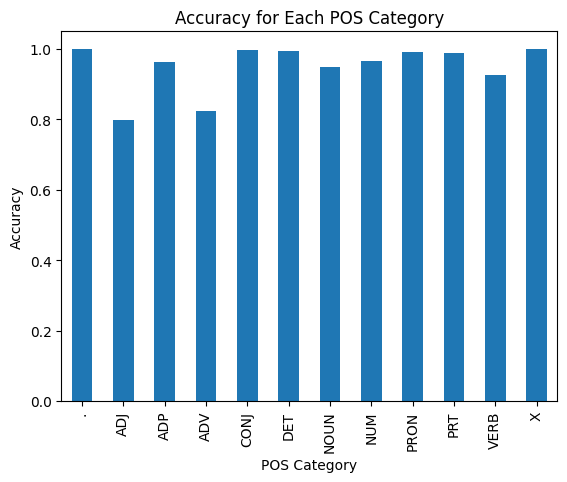

In [ ]:
actual_tags = []
predicted_tags = []

for sent in test_sentences:
    sent_tags = [tag for (word, tag) in sent]
    actual_tags.extend(sent_tags)

    predicted = crf_tagger.tag([word for (word, tag) in sent])
    predicted_tags.extend([tag for (word, tag) in predicted])


from sklearn.metrics import confusion_matrix
import pandas as pd

labels = sorted(set(actual_tags + predicted_tags))
conf_matrix = confusion_matrix(actual_tags, predicted_tags, labels=labels)
conf_df = pd.DataFrame(conf_matrix, index=labels, columns=labels)

print("Confusion Matrix:")
print(conf_df)

import matplotlib.pyplot as plt

# Calculate the accuracy for each category
accuracies = conf_df.values.diagonal() / conf_df.sum(axis=1)

# Convert to Series for plotting
accuracies_series = pd.Series(accuracies, index=labels)

# Plot the accuracies
accuracies_series.plot(kind='bar')
plt.title('Accuracy for Each POS Category')
plt.xlabel('POS Category')
plt.ylabel('Accuracy')
plt.show()


### Chapter 2: CRF NER using CoNLL-2003

The shared task of CoNLL-2003 concerns language-independent named entity recognition. We will concentrate on four types of named entities: persons, locations, organizations and names of miscellaneous entities that do not belong to the previous three groups. For more information on the CoNLL-2003 dataset, including access to the raw data files for training, validation, and testing, please visit the [dedicated page on the Hugging Face website](https://huggingface.co/datasets/conll2003).




To begin, install the datasets library from Hugging Face to access the conll2003 dataset. Additionally, ensure that sklearn-crfsuite is installed for this chapter's exercises, particularly if you do this chapter on a different day than chapter 1.

In [ ]:
! pip install datasets
! pip install sklearn-crfsuite

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.5 MB/s eta 0:00:00


Load conll2003 dataset using HuggingFace `datasets` library and see what NER tags are available


In [ ]:
from datasets import load_dataset
conll2003_dataset = load_dataset("conll2003")

ner_tags_feature = conll2003_dataset["train"].features["ner_tags"].feature
ner_tags_mapping = {id: ner_tags_feature.int2str(id) for id in range(ner_tags_feature.num_classes)}

print(list(ner_tags_mapping.values()))

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/14041 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/3250 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/3453 [00:00<?, ? examples/s]

['O', 'B-PER', 'I-PER', 'B-ORG', 'I-ORG', 'B-LOC', 'I-LOC', 'B-MISC', 'I-MISC']


POS tags can serve as a valuable feature for training NER systems. To explore the POS tags available in the conll2003 (training) dataset, run the code block below.

In [ ]:
# Get the 'pos_tags' feature
pos_feature = conll2003_dataset["train"].features["pos_tags"].feature

# Create the mapping
pos_tags_mapping = {pos_feature.int2str(id): id for id in range(pos_feature.num_classes)}
# Inverting the pos_tags dictionary for lookup
pos_tags_inv = {v: k for k, v in pos_tags_mapping.items()}

print(list(pos_tags_inv.values()))

['"', "''", '#', '$', '(', ')', ',', '.', ':', '``', 'CC', 'CD', 'DT', 'EX', 'FW', 'IN', 'JJ', 'JJR', 'JJS', 'LS', 'MD', 'NN', 'NNP', 'NNPS', 'NNS', 'NN|SYM', 'PDT', 'POS', 'PRP', 'PRP$', 'RB', 'RBR', 'RBS', 'RP', 'SYM', 'TO', 'UH', 'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ', 'WDT', 'WP', 'WP$', 'WRB']


The next code block saves train and test splits of the conll2003 dataset to local files in a specific format and then loads these files for processing. The write_to_conll function converts training and test sets into a text format suitable for the ConllCorpusReader from NLTK, which is then used to read the data, organizing words, POS tags, and chunk tags for our following tasks.

In [ ]:
from nltk.corpus.reader import ConllCorpusReader
from nltk import MaxentClassifier
from nltk.tag import untag
from nltk.chunk import conlltags2tree, tree2conlltags

# Save the dataset to local files (You need to create a write_to_conll function for this)
def write_to_conll(partition, filename):
    with open(filename, 'w') as f:
        for sentence in partition:
            for word, tag, pos, chunk in zip(sentence['tokens'], sentence['ner_tags'], sentence['pos_tags'], sentence['chunk_tags']):
                f.write(f"{word} {pos} {chunk} {tag}\n")
            f.write("\n")

# Use the function to write the train and test sets
write_to_conll(conll2003_dataset['train'], 'eng.train')
write_to_conll(conll2003_dataset['test'], 'eng.test')

# Load the saved CoNLL formatted data
train = ConllCorpusReader('.', 'eng.train', ['words', 'pos', 'ignore', 'chunk'])
test = ConllCorpusReader('.', 'eng.test', ['words', 'pos', 'ignore', 'chunk'])

This code snippet fetches a gazetteer containing comprehensive country information such as ISO codes, names, capitals, areas, populations, continents, TLDs, currency codes and names, phone codes, postal code formats, and languages. This detailed gazetteer is incorporated as a feature in training the CRF model.

In [ ]:
import requests

url = 'http://download.geonames.org/export/dump/countryInfo.txt'
r = requests.get(url)

# Save the gazetteer to a local file
with open('gazetteer.txt', 'w') as f:
    f.write(r.text)

gazetteer_set = set()
# Load the gazetteer into a set for quick lookup
with open('gazetteer.txt', 'r', encoding='utf-8') as f:
    for line in f:
        if line.startswith('#'):
            continue  # Skip comments
        country_info = line.split('\t')
        if country_info:
            country_name = country_info[4].lower()  # Assuming country names are in the fifth column
            gazetteer_set.add(country_name)


### 📚 Task 2
As we learned from class, we know that gazetteers, word shape, context, and other word features like POS tags are crucial for NER. In the following code provided, you're tasked with enhancing the `word2features` function by defining additional features. The current setup includes POS tags, a gazetteer, basic word shape features, and contextual features. You are encouraged to expand this by adding at least two more word shape features. Hint: consider choosing from [Python's string methods whose names starting with `is`](https://www.w3schools.com/python/python_ref_string.asp). You are encouraged to experiment putting your features into contextual features (previous and next word features) to see if accuracy can be incrased, but it's optional.

You will receive extra credit for each additional feature you define, up to a maximum of three. However, by defining the extra features, you must ensure that your model's accuracy does not fall below the 95% accuracy baseline, which can already be achieved using the default features provided in the function.

Define your features after these comments
        # define your feature #1
        # define your feature #2
        # extra creidt #1
        # extra creidt #2
        # extra creidt #3
        # (optional) define your features

In [ ]:
from sklearn_crfsuite.metrics import flat_accuracy_score
from sklearn.metrics import classification_report
from itertools import chain

def word2features(sent, i, gazetteer):
    word = sent[i][0]
    postag = sent[i][1]

    features = {
        'bias': 1.0,
        'word.lower()': word.lower(),
        'word.isupper()': word.isupper(),
        'word.istitle()': word.istitle(),
        'word.isdigit()': word.isdigit(),
        # define your feature #1
        'word ends in ed' : word.endswith("ed"),
        # define your feature #2
        'word starts with un' : word.startswith("un"),
        # extra creidt #1
        'word is lower' : word.islower(),
        # extra creidt #2
        'word.isalpha' : word.isalpha(),
        # extra creidt #3
        'word.isidentifier()' : word.isidentifier(),
        'postag': postag,
        'word in gazetteer': word in gazetteer,  # Gazetteer feature
    }

    # Add contextual features (previous and next word features)
    if i > 0:
        prev_word = sent[i-1][0]
        prev_postag = sent[i-1][1]
        features.update({
            '-1:word.lower()': prev_word.lower(),
            '-1:word.istitle()': prev_word.istitle(),
            '-1:word.isupper()': prev_word.isupper(),
            # (optional) define your features
            '-1:postag': prev_postag
        })
    if i < len(sent)-1:
        next_word = sent[i+1][0]
        next_postag = sent[i+1][1]
        features.update({
            '+1:word.lower()': next_word.lower(),
            '+1:word.istitle()': next_word.istitle(),
            '+1:word.isupper()': next_word.isupper(),
            # (optional) define your features
            '+1:postag': next_postag
        })

    return features

def sent2features(sent, gazetteer):
    return [word2features(sent, i, gazetteer) for i in range(len(sent))]

def sent2labels(sent):
    return [label for token, postag, label in sent]



The following code trains a CRF model for NER using the pre-processed conll2003 training dataset. After training, the model's performance is evaluated on the conll2003 test dataset and prints the overall accuracy. We employ [`sklearn_crfsuite.CRF`](https://sklearn-crfsuite.readthedocs.io/en/latest/api.html#sklearn_crfsuite.CRF) for this purpose.

### 📚 Task 3
Before executing this cell, write code in appropriate places to measure and print the training and evaluation duration (in seconds) of this CRF model to the console output, just like in Task 1.

In [ ]:
from sklearn_crfsuite import CRF
start = time.time()
train_sents = list(train.iob_sents())
X_train = [sent2features(s, gazetteer_set) for s in train_sents]
y_train = [sent2labels(s) for s in train_sents]

test_sents = list(test.iob_sents())
# Now, prepare the test features and labels
X_test = [sent2features(s, gazetteer_set) for s in test_sents]
y_test = [sent2labels(s) for s in test_sents]

# Initialize and train the CRF model
crf = CRF(
    algorithm='lbfgs',
    c1=0.1,
    c2=0.1,
    max_iterations=100,
    all_possible_transitions=True
)
crf.fit(X_train, y_train)

# Predict on the test set
y_pred = crf.predict(X_test)

# Flatten the lists
y_test_flat = list(chain(*y_test))
y_pred_flat = list(chain(*y_pred))

# Now generate the classification report
report = classification_report(y_test_flat, y_pred_flat)
# print(report)

# Calculate the flat accuracy score
accuracy = flat_accuracy_score(y_test, y_pred)
end = time.time()
print(f"Training/Eval Time: {end - start}")
print(f'Overall Accuracy: {accuracy}')

Training/Eval Time: 40.31410837173462
Overall Accuracy: 0.9569075051146765


Run the cell below to see the first three example predictions. In the displayed output, the first entity of the initial example `(O SOCCER/NN)` shows the NER predicted tag `O` followed by its actual POS tag `/NN`, utilizing the POS tags directly from the dataset as features.

In [ ]:
# Function to format the output
def format_output(sent, predicted_tags):
    # Convert numeric predicted tags to their string labels
    predicted_tag_labels = [ner_tags_mapping[int(tag)] for tag in predicted_tags]
    return ['({} {}/{})'.format(tag, word, pos_tags_inv[int(pos)]) for (word, pos, _), tag in zip(sent, predicted_tag_labels)]

# Select a subset of sentences to display
for i, (sent, predicted_tags) in enumerate(zip(test_sents, y_pred)):
    if i < 3:  # Change 3 to the number of sentences you want to display
        formatted_output = format_output(sent, predicted_tags)
        print(formatted_output)

['(O SOCCER/NN)', '(O -/:)', '(B-LOC JAPAN/NNP)', '(O GET/VB)', '(O LUCKY/NNP)', '(O WIN/NNP)', '(O ,/,)', '(B-LOC CHINA/NNP)', '(O IN/IN)', '(O SURPRISE/DT)', '(O DEFEAT/NN)', '(O ./.)']
['(B-PER Nadim/NNP)', '(I-PER Ladki/NNP)']
['(O AL-AIN/NNP)', '(O ,/,)', '(B-ORG United/NNP)', '(I-ORG Arab/NNP)', '(I-ORG Emirates/NNPS)', '(O 1996-12-06/CD)']


Run the next code block to display the confusion matrix and a bar chart showing the accuracy for each NER tag. This will give you an idea of the model's performance across different tags.

            O  B-PER  I-PER  B-ORG  I-ORG  B-LOC  I-LOC  B-MISC  I-MISC
O       37916     60     36     90    106     28     14      38      35
B-PER      74   1385     14     63     13     57      2       7       2
I-PER       3      3   1099      0     47      0      0       0       4
B-ORG     137    154      4   1213     18     99      1      34       1
I-ORG      48      9     89     19    622      6     25       3      14
B-LOC      52     47      3    172     12   1350      0      31       1
I-LOC      12      0     15      0     57      4    168       0       1
B-MISC     71     27      2     45      2     19      0     535       1
I-MISC     22      3     19      0     16      2      3       5     146


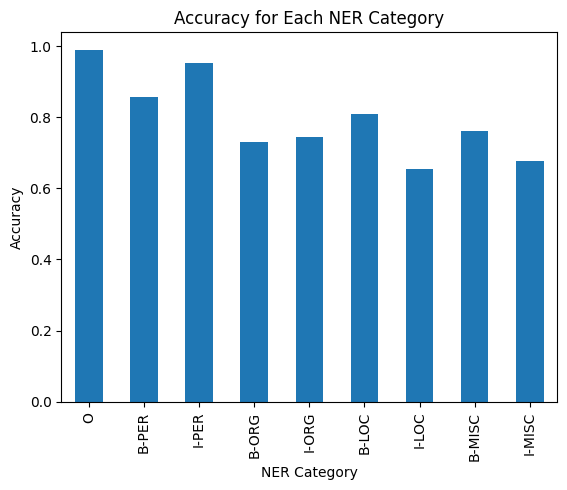

In [ ]:
from sklearn_crfsuite import CRF
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate the confusion matrix
labels = sorted(set(y_test_flat + y_pred_flat))  # Get all unique labels
label_mappings = [ner_tags_mapping[l] for l in range(9)]
conf_matrix = confusion_matrix(y_test_flat, y_pred_flat, labels=labels)
conf_df = pd.DataFrame(conf_matrix, index=label_mappings, columns=label_mappings)
print(conf_df)

# Calculate the accuracy for each category
accuracies = np.diag(conf_matrix) / np.sum(conf_matrix, axis=1)

# Convert to Series for plotting
accuracies_series = pd.Series(accuracies, index=label_mappings)

# Plot the accuracies
accuracies_series.plot(kind='bar')
plt.title('Accuracy for Each NER Category')
plt.xlabel('NER Category')
plt.ylabel('Accuracy')
plt.xticks(rotation=90)  # Rotate labels to avoid overlap
plt.show()


### Chapter 3: Fine-Tuning BERT for POS Tagging with Penn Treebank

This chapter focuses on fine-tuning the BERT base model for POS tagging, including a comparative analysis of training (fine-tuning) time, inference time, and accuracy against the CRF model previously implemented with NLTK in Chapter 1.

⚠️ Note: During the creation of this assignment, utilizing a GPU for this task frequently caused crashes, so retaining the CPU as the default hardware accelerator is advisable. Consequently, **the fine-tuning and inferencing duration we will later print do not leverage GPU acceleration, which is typically preferred in deep learning practices**. You may experiment with the GPU if desired, but avoids the use of TPU, as it necessitates different libraries, unless you're interested in exploring it on your own.

To maintain consistency, the same data splits from the Penn Treebank dataset will be used for both training and testing. Additionally, the code and methods employed in this section were heavily inspired by [this notebook](https://github.com/Kyubyong/nlp_made_easy/blob/master/Pos-tagging%20with%20Bert%20Fine-tuning.ipynb).

Start by installing the `pytorch_pretrained_bert` library.

In [ ]:
! pip install pytorch_pretrained_bert

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.8/123.8 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 41.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 44.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 59.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 962.2 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━


To guarantee the use of an identical dataset, we will continue to use NLTK for downloading the Penn Treebank dataset. Ultimately, we will confirm that the tags present in the dataset match those displayed in the confusion matrix from Chapter 1.

In [ ]:
import os
from tqdm import tqdm_notebook as tqdm
import numpy as np
import torch
import torch.nn as nn
from torch.utils import data
import torch.optim as optim
from pytorch_pretrained_bert import BertTokenizer
import nltk
from nltk.corpus import treebank


nltk.download('treebank')

nltk.download('universal_tagset')

# Load the data
tagged_sents = treebank.tagged_sents(tagset='universal')

# Extract all unique tags from the corpus
unique_tags = set(tag for sentence in tagged_sents for (_, tag) in sentence)

# Create a mapping from tags to indices
tag_to_index = {tag: index for index, tag in enumerate(sorted(unique_tags))}

# Create a mapping from indices to tags
index_to_tag = {index: tag for tag, index in tag_to_index.items()}

tags = list(index_to_tag.values())
print(tags)


[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Package treebank is already up-to-date!
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


['.', 'ADJ', 'ADP', 'ADV', 'CONJ', 'DET', 'NOUN', 'NUM', 'PRON', 'PRT', 'VERB', 'X']


Different from the CRF model, the BERT model requires the input data to have special tokens like <CLS> at the start and <SEP> at the end of sentences for proper sequence demarcation and processing, as well as <pad> tokens to ensure all input sequences are of uniform length for batch processing. We run the following code to process our dataset to add those speical tokens.

In [ ]:
# By convention, the 0'th slot is reserved for padding.
tags = ["<pad>"] + tags

tag2idx = {tag:idx for idx, tag in enumerate(tags)}
idx2tag = {idx:tag for idx, tag in enumerate(tags)}

train_data = tagged_sents[:3000]
test_data = tagged_sents[3000:]

device = 'cuda' if torch.cuda.is_available() else 'cpu'

tokenizer = BertTokenizer.from_pretrained('bert-base-cased', do_lower_case=False)

class PosDataset(data.Dataset):
    def __init__(self, tagged_sents):
        sents, tags_li = [], [] # list of lists
        for sent in tagged_sents:
            words = [word_pos[0] for word_pos in sent]
            tags = [word_pos[1] for word_pos in sent]
            sents.append(["[CLS]"] + words + ["[SEP]"])
            tags_li.append(["<pad>"] + tags + ["<pad>"])
        self.sents, self.tags_li = sents, tags_li

    def __len__(self):
        return len(self.sents)

    def __getitem__(self, idx):
        words, tags = self.sents[idx], self.tags_li[idx] # words, tags: string list

        # We give credits only to the first piece.
        x, y = [], [] # list of ids
        is_heads = [] # list. 1: the token is the first piece of a word
        for w, t in zip(words, tags):
            tokens = tokenizer.tokenize(w) if w not in ("[CLS]", "[SEP]") else [w]
            xx = tokenizer.convert_tokens_to_ids(tokens)

            is_head = [1] + [0]*(len(tokens) - 1)

            t = [t] + ["<pad>"] * (len(tokens) - 1)  # <PAD>: no decision
            yy = [tag2idx[each] for each in t]  # (T,)

            x.extend(xx)
            is_heads.extend(is_head)
            y.extend(yy)

        assert len(x)==len(y)==len(is_heads), "len(x)={}, len(y)={}, len(is_heads)={}".format(len(x), len(y), len(is_heads))

        # seqlen
        seqlen = len(y)

        # to string
        words = " ".join(words)
        tags = " ".join(tags)
        return words, x, is_heads, tags, y, seqlen

def pad(batch):
    '''Pads to the longest sample'''
    f = lambda x: [sample[x] for sample in batch]
    words = f(0)
    is_heads = f(2)
    tags = f(3)
    seqlens = f(-1)
    maxlen = np.array(seqlens).max()

    f = lambda x, seqlen: [sample[x] + [0] * (seqlen - len(sample[x])) for sample in batch] # 0: <pad>
    x = f(1, maxlen)
    y = f(-2, maxlen)


    f = torch.LongTensor

    return words, f(x), is_heads, tags, f(y), seqlens

100%|██████████| 213450/213450 [00:00<00:00, 3619521.60B/s]



The following code redefines the network architecture to be used with BERT, initializing it with `self.bert = BertModel.from_pretrained('bert-base-cased')` and a fully connected layer `self.fc = nn.Linear(768, vocab_size)` to process BERT’s output for tag prediction. It includes methods for initialization and forward pass, and functions train and eval for model training and evaluation, optimizing the model with training data and assessing performance on test data. At the end, we set up data loaders for training and evaluation datasets, define the optimizer and loss criterion, and create the model object.

In [ ]:
from pytorch_pretrained_bert import BertModel
class Net(nn.Module):
    def __init__(self, vocab_size=None):
        super().__init__()
        self.bert = BertModel.from_pretrained('bert-base-cased')

        self.fc = nn.Linear(768, vocab_size)
        self.device = device

    def forward(self, x, y):
        '''
        x: (N, T). int64
        y: (N, T). int64
        '''
        x = x.to(device)
        y = y.to(device)

        if self.training:
            self.bert.train()
            encoded_layers, _ = self.bert(x)
            enc = encoded_layers[-1]
        else:
            self.bert.eval()
            with torch.no_grad():
                encoded_layers, _ = self.bert(x)
                enc = encoded_layers[-1]

        logits = self.fc(enc)
        y_hat = logits.argmax(-1)
        return logits, y, y_hat

def train(model, iterator, optimizer, criterion, num_epochs):
    for epoch in range(num_epochs):
        model.train()
        total_loss = 0
        for i, batch in enumerate(iterator):
            words, x, is_heads, tags, y, seqlens = batch
            optimizer.zero_grad()
            logits, y, _ = model(x, y)  # logits: (N, T, VOCAB), y: (N, T)

            logits = logits.view(-1, logits.shape[-1])  # (N*T, VOCAB)
            y = y.view(-1)  # (N*T,)

            loss = criterion(logits, y)
            loss.backward()
            optimizer.step()

            total_loss += loss.item()

            if (i + 1) % 10 == 0:  # monitoring
                print(f"Epoch: {epoch + 1}, Step: {i + 1}, Loss: {loss.item()}")

        average_loss = total_loss / len(iterator)
        print(f"End of Epoch {epoch + 1}, Average Loss: {average_loss}")


def eval(model, iterator):
    model.eval()

    Words, Is_heads, Tags, Y, Y_hat = [], [], [], [], []
    with torch.no_grad():
        for i, batch in enumerate(iterator):
            words, x, is_heads, tags, y, seqlens = batch

            _, _, y_hat = model(x, y)  # y_hat: (N, T)

            Words.extend(words)
            Is_heads.extend(is_heads)
            Tags.extend(tags)
            Y.extend(y.numpy().tolist())
            Y_hat.extend(y_hat.cpu().numpy().tolist())

    ## gets results and save
    with open("result", 'w') as fout:
        for words, is_heads, tags, y_hat in zip(Words, Is_heads, Tags, Y_hat):
            y_hat = [hat for head, hat in zip(is_heads, y_hat) if head == 1]
            preds = [idx2tag[hat] for hat in y_hat]
            assert len(preds)==len(words.split())==len(tags.split())
            for w, t, p in zip(words.split()[1:-1], tags.split()[1:-1], preds[1:-1]):
                fout.write("{} {} {}\n".format(w, t, p))
            fout.write("\n")

    ## calc metric
    y_true =  np.array([tag2idx[line.split()[1]] for line in open('result', 'r').read().splitlines() if len(line) > 0])
    y_pred =  np.array([tag2idx[line.split()[2]] for line in open('result', 'r').read().splitlines() if len(line) > 0])

    acc = (y_true==y_pred).astype(np.int32).sum() / len(y_true)

    print("acc=%.6f"%acc)

    return Y, Y_hat

model = Net(vocab_size=len(tag2idx))
model.to(device)
model = nn.DataParallel(model)

train_dataset = PosDataset(train_data)
eval_dataset = PosDataset(test_data)

train_iter = data.DataLoader(dataset=train_dataset,
                             batch_size=8,
                             shuffle=True,
                             num_workers=1,
                             collate_fn=pad)
test_iter = data.DataLoader(dataset=eval_dataset,
                             batch_size=8,
                             shuffle=False,
                             num_workers=1,
                             collate_fn=pad)

optimizer = optim.Adam(model.parameters(), lr = 0.0001)

criterion = nn.CrossEntropyLoss(ignore_index=0)

100%|██████████| 404400730/404400730 [00:13<00:00, 30301069.98B/s]


The code below initiates the fine-tuning process.

### 📚 Task 4
Prior to running this cell, insert code snippets at suitable locations to track and display the training duration (in seconds) for this variant of the BERT model, similar to Task 1. Ensure that the model is fine-tuned for at least one epoch.

☕️ One-epoch fine-tuning will take about half an hour on CPU

In [ ]:
num_epochs = 1
start = time.time()
train(model, train_iter, optimizer, criterion, num_epochs)
end = time.time()
print(f"Train time: {end-start}")

Epoch: 1, Step: 10, Loss: 0.8938086032867432
Epoch: 1, Step: 20, Loss: 0.26128140091896057
Epoch: 1, Step: 30, Loss: 0.22143004834651947
Epoch: 1, Step: 40, Loss: 0.06421755254268646
Epoch: 1, Step: 50, Loss: 0.12289514392614365
Epoch: 1, Step: 60, Loss: 0.12036026269197464
Epoch: 1, Step: 70, Loss: 0.04572397470474243
Epoch: 1, Step: 80, Loss: 0.14661568403244019
Epoch: 1, Step: 90, Loss: 0.05539163574576378
Epoch: 1, Step: 100, Loss: 0.06187191233038902
Epoch: 1, Step: 110, Loss: 0.09346002340316772
Epoch: 1, Step: 120, Loss: 0.13080456852912903
Epoch: 1, Step: 130, Loss: 0.029496045783162117
Epoch: 1, Step: 140, Loss: 0.11352422833442688
Epoch: 1, Step: 150, Loss: 0.09716911613941193
Epoch: 1, Step: 160, Loss: 0.07932323962450027
Epoch: 1, Step: 170, Loss: 0.07907559722661972
Epoch: 1, Step: 180, Loss: 0.06658954173326492
Epoch: 1, Step: 190, Loss: 0.04477434977889061
Epoch: 1, Step: 200, Loss: 0.08263298869132996
Epoch: 1, Step: 210, Loss: 0.04836714267730713
Epoch: 1, Step: 220, L

The code below initiates the evaluation process.

### 📚 Task 5
Prior to running this cell, insert code snippets at suitable locations to track and display the inferencing duration (in seconds) for this variant of the BERT model, similar to Task 1. Additionally, the code will output the model's prediction accuracy. Note this accuracy for a subsequent comparison with the CRF model's accuracy from Chapter 1.

In [ ]:
start = time.time()

actuals, predictions = eval(model, test_iter)
end = time.time()
print(f"Train time: {end-start}")

acc=0.983855
Train time: 228.7740626335144



Run the next code block to display the confusion matrix and a bar chart showing the accuracy for each POS tag. This will give you an idea of the BERT's performance across different tags.

         .   ADJ   ADP  ADV  CONJ   DET  NOUN   NUM  PRON  PRT  VERB     X
.     2587     0     0    0     0     0     0     0     0    0     0     0
ADJ      0  1341     6   24     0     0    34     4     0    0    10     0
ADP      0     0  2284   11     0     1     0     0     0    0     2     0
ADV      0    16    15  565     0     1     1     0     0    0     1     0
CONJ     0     0     1    0   502     0     0     0     0    0     0     0
DET      0     3     4    0     0  1957     4     0     0    0     0     0
NOUN     0   138     0    3     1     2  6693     2     0    0     9     1
NUM      0     0     0    0     0     0     1  1206     0    1     0     0
PRON     0     0     0    0     0     0     0     0   408    0     0     0
PRT      0     0    20    3     0     0     0     0     0  758     0     0
VERB     0    28     0    0     0     0    27     0     0    0  2987     0
X        0     0     0    0     0     0     0     0     0    0     0  1503


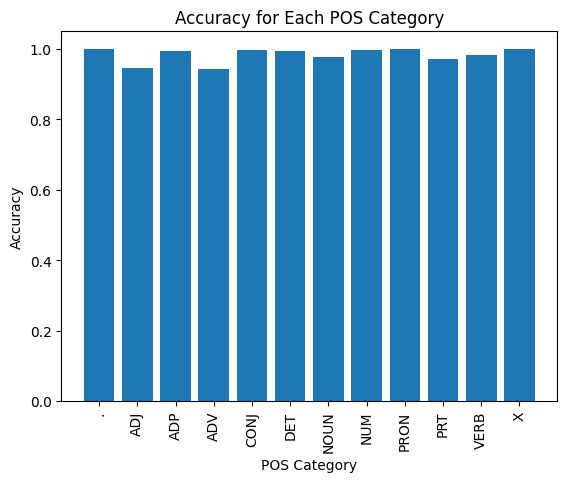

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming actuals and predictions are lists of lists of tags
flat_actuals = [tag for sublist in actuals for tag in sublist]
flat_predictions = [tag for sublist in predictions for tag in sublist]

# Ensure all tags from both actuals and predictions are included, excluding the <pad> tag
all_tags = sorted(set(flat_actuals + flat_predictions) - {0})

# Get the label mappings excluding the <pad> tag
label_mappings = [idx2tag[i] for i in all_tags]

# Calculate the confusion matrix
conf_matrix = confusion_matrix(flat_actuals, flat_predictions, labels=all_tags)

# Create a DataFrame with row and column names set to the POS tags
conf_df = pd.DataFrame(conf_matrix, index=label_mappings, columns=label_mappings)

# Show the confusion matrix
print(conf_df)

# Calculate the accuracy for each category
accuracies = conf_df.to_numpy().diagonal() / conf_df.sum(axis=1)

# Plot the accuracies
plt.bar(label_mappings, accuracies)
plt.title('Accuracy for Each POS Category')
plt.xlabel('POS Category')
plt.ylabel('Accuracy')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
plt.show()


### Chapter 4: Fine-Tuning BERT for NER using CoNLL-2003

This chapter delves into the fine-tuning of the BERT model for Named Entity Recognition (NER), offering a side-by-side evaluation of training duration, inference speed, and prediction accuracy in comparison to the CRF model utilized previously with NLTK in Chapter 2. For this task, we'll utilize the [`distilbert-base-cased`](https://huggingface.co/docs/transformers/model_doc/distilbert) model, a more compact variant of BERT, due to its lengthy fine-tuning process which necessitates potentially saving the fine-tuned model to Google Drive.

⚠️ Note: For consistency, please use the same hardware accelerator as in Chapter 3 for this task.

To ensure uniformity, the same splits from the conll2003 dataset will be employed for training and testing. I extensively referred to [this Kaggle notebook](https://www.kaggle.com/code/farshadjafari97/fine-tuning-bert-for-ner) for the following cdoe.

Start by installing necessary packages.

In [ ]:
! pip install seqeval
! pip install -U accelerate
! pip install -U transformers
! pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 1.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16161 sha256=878a89033f299c5f2bee44075ff5357e60084ba1ebe70f93a73fb2b084ce722c
  Stored in directory: /root/.cache/pip/wheels/1a/67/4a/ad4082dd7dfc30f2abfe4d80a2ed5926a506eb8a972b4767fa
Successfully built seqeval
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.3/297.3 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 48.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 45.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.0 MB/s eta 0:00:00


As highlighted in Chapter 1, execute the cell below to restart your runtime, guaranteeing that the necessary packages are available for subsequent code cells.

In [ ]:
import os
os._exit(00)


Like in Chapter 2, we first load the CoNLL-2003 dataset from Hugging Face. Then, we tokenize it using a BERT tokenizer for the NER task. It aligns the NER labels with the tokenized input, handling special tokens and word pieces to ensure accurate label assignment. Then, it initializes a BERT model for token classification, sets up training parameters, and defines a custom metric computation for NER performance evaluation. The model is fine-tuned (trained) and evaluated using the Hugging Face Trainer class, which handles the training loop and evaluation.

In [ ]:
from datasets import load_dataset
import numpy as np

# Load the CoNLL-2003 dataset using the 'datasets' library.
dataset = load_dataset('conll2003')

from transformers import AutoTokenizer
checkpoint = 'distilbert-base-cased'  # or any other checkpoint like 'bert-base-cased'
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

from transformers import DataCollatorForTokenClassification

def align_labels_with_tokens(labels, word_ids):
    new_labels = []
    label_index = 0

    for word_id in word_ids:
        if word_id is None:
            new_labels.append(-100)  # Use -100 to ignore these tokens in the loss computation
        else:
            if word_id != label_index:
                label_index = word_id
            new_labels.append(labels[label_index] if label_index < len(labels) else -100)

    return new_labels

def tokenize_and_align_labels(examples):
    # Tokenize the text and get word ID mappings
    tokenized_inputs = tokenizer(examples['tokens'], truncation=True, is_split_into_words=True)

    labels = []
    for i, label in enumerate(examples['ner_tags']):
        word_ids = tokenized_inputs.word_ids(batch_index=i)  # Get word IDs for the current sentence
        previous_word_id = None
        label_ids = []
        for word_id in word_ids:
            # Special tokens have a word id that is None. We set the label to -100 so they are automatically
            # ignored in the loss function.
            if word_id is None:
                label_ids.append(-100)
            # We set the label for the first token of each word.
            elif word_id != previous_word_id:
                label_ids.append(label[word_id])
            # For the other tokens in a word, we set the label to -100
            else:
                label_ids.append(-100)
            previous_word_id = word_id
        labels.append(label_ids)

    tokenized_inputs["labels"] = labels
    return tokenized_inputs

# Apply the function to all splits
tokenized_dataset = dataset.map(tokenize_and_align_labels, batched=True, remove_columns=dataset['train'].column_names)


data_collator = DataCollatorForTokenClassification(tokenizer=tokenizer)


from transformers import AutoModelForTokenClassification, TrainingArguments, Trainer

label_list = dataset["train"].features["ner_tags"].feature.names
num_labels = len(label_list)

model = AutoModelForTokenClassification.from_pretrained(checkpoint, num_labels=num_labels)

label_names = dataset['train'].features['ner_tags'].feature.names

from transformers import AutoModelForTokenClassification, TrainingArguments, Trainer
# Import the seqeval metric from Hugging Face's datasets library
from datasets import load_metric

# Load the seqeval metric which can evaluate NER and other sequence tasks
metric = load_metric("seqeval")

# Example usage: compute metric on a sample predictions and reference list
# predictions and references should be a list of lists containing predicted and true token labels

# List of List Input
metric.compute(predictions = [['O' , 'B-ORG' , 'I-ORG']],
               references = [['O' , 'B-MISC' , 'I-ORG']])

def compute_metrics(logits_and_labels):

  # Unpack the logits and labels
  logits, labels = logits_and_labels

  # Get predictions from the logits
  predictions = np.argmax(logits, axis=-1)

  # Remove ignored index (special tokens)
  str_labels = [
    [label_names[t] for t in label if t!=-100] for label in labels
  ]

  str_preds = [
    [label_names[p] for (p, t) in zip(prediction, label) if t != -100]
    for prediction, label in zip(predictions, labels)
  ]

  # Compute metrics
  results = metric.compute(predictions=str_preds, references=str_labels)

  # Extract key metrics
  return {
    "precision": results["overall_precision"],
    "recall": results["overall_recall"],
    "f1": results["overall_f1"],
    "accuracy": results["overall_accuracy"]
  }

training_args = TrainingArguments(
  # Location to save fine-tuned model
  output_dir = "fine_tuned_model",

  # Evaluate each epoch
  evaluation_strategy = "epoch",

  # Learning rate for Adam optimizer
  learning_rate = 2e-5,

  # Batch sizes for training and evaluation
  per_device_train_batch_size = 16,
  per_device_eval_batch_size = 16,

  # Number of training epochs
  num_train_epochs = 1,

  # L2 weight decay regularization
  weight_decay = 0.01
)

trainer = Trainer(
  # Model to train
  model=model,

  # Training arguments
  args=training_args,

  # Training and validation datasets
  train_dataset=tokenized_dataset["train"],
  eval_dataset=tokenized_dataset["validation"],

  # Tokenizer
  tokenizer=tokenizer,

  # Custom metric function
  compute_metrics=compute_metrics,

  # Data collator
  data_collator=data_collator
)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Map:   0%|          | 0/3250 [00:00<?, ? examples/s]

model.safetensors:   0%|          | 0.00/263M [00:00<?, ?B/s]

Some weights of DistilBertForTokenClassification were not initialized from the model checkpoint at distilbert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-1-51dc704ce01a>:74: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  metric = load_metric("seqeval")
/usr/local/lib/python3.10/dist-packages/datasets/load.py:756: FutureWarning: The repository for seqeval contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/2.18.0/metrics/seqeval/seqeval.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` wil

/usr/local/lib/python3.10/dist-packages/seqeval/metrics/v1.py:57: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:436: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(


The fine-tuning process for this model is expected to last approximately two hours per epoch when using a CPU accelerator. To prevent losing your model due to inactivity after training completes, especially if you're not actively monitoring the notebook, it's advisable to save the fine-tuned model to Google Drive. This precaution allows you to retrieve the model from Google Drive later for prediction tasks. The model takes about 250MB in space.

Start by executing the following cell to mount your Google Drive.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Specify the path where you want to save your model. Feel free to use the default path I have provided if it suits your needs.

⚠️ NOTE, BELOW IS THE FIFTH CODE CELL!

In [ ]:
# THIS IS THE FIFTH CODE CELL
# DO NOT RUN THIS CELL IF A FINE TUNED MODEL HAS ALREADY BEEN SAVED, OTHERWISE IT WILL BE DELETED

import os
import shutil

model_saving_path = '/content/drive/MyDrive/NLP Homework 3/fine_tuned_BERT_NER'

# Check if the folder exists
if os.path.exists(model_saving_path):
    # Empty the folder by deleting and recreating it
    shutil.rmtree(model_saving_path)
    os.makedirs(model_saving_path)
else:
    # Create the folder because it does not exist
    os.makedirs(model_saving_path)

Run the code below to begin fine-tuning, which is set to complete one epoch by default, as specified by the `num_train_epochs` variable in the `training_args` within this chapter's third cell. If desired, you can adjust the number of epochs. Expect the one-epoch fine-tuning to last approximately 2 hours on a CPU, with the model being saved to the designated path in your Google Drive post-training.

### 📚 Task 6
Prior to running this cell, insert code snippets at suitable locations to track and display the fine-tuning duration (in seconds) for this variant of the BERT model, simialr to Task 1.

In [ ]:
import time
start = time.time()
trainer.train()
end = time.time()
print(f"Train time: {end - start}")
trainer.save_model(model_saving_path)

Epoch,Training Loss,Validation Loss


Epoch,Training Loss,Validation Loss,Precision,Recall,F1,Accuracy
1,0.187100,0.065372,0.897410,0.903904,0.900646,0.982711


Train time: 4364.185080766678


At this moment, check if your runtime is still active; if the last cell's status is green with a sequence number, you can skip the below cell and no need to read further.


Otherwise, if your runtime has been terminated and you have saved the fine-tuned model on Google Drive, you should rerun the first four code cells from this chapter, 🛑 STOPPING before the fifth cell to avoid deleting your saved model (identified by the comment "# THIS IS THE FIFTH CODE CELL").

After completing these steps, proceed to run the cell that follows to load your model and reinitialize the trainer with the loaded model.

In [ ]:
from transformers import AutoModelForTokenClassification

model_saving_path = '/content/drive/MyDrive/NLP Homework 3/fine_tuned_BERT_NER'
model = AutoModelForTokenClassification.from_pretrained(model_saving_path)

trainer = Trainer(
  # Model to train
  model=model,

  # Training arguments
  args=training_args,

  # Training and validation datasets
  train_dataset=tokenized_dataset["train"],
  eval_dataset=tokenized_dataset["validation"],

  # Tokenizer
  tokenizer=tokenizer,

  # Custom metric function
  compute_metrics=compute_metrics,

  # Data collator
  data_collator=data_collator
)

### 📚 Task 7
Prior to running this cell, insert code snippets at suitable locations to track and display the inference duration (in seconds) for the DistilBERT model, simialr to Task 1.

This cell will also display the confusion matrix and a bar chart showing the accuracy for each NER tag. This will give you an idea of the model's performance across different tags.

Confusion Matrix:
        B-LOC  B-MISC  B-ORG  B-PER  I-LOC  I-MISC  I-ORG  I-PER      O
B-LOC    1523      26     73      7      3       2      5      1     28
B-MISC     43     531     52      5      0       2      1      0     68
B-ORG      73      42   1451     25      0       1     15      0     54
B-PER      14       8     32   1531      0       0      2      5     25
I-LOC       3       0      0      0    195       6     39      5      9
I-MISC      1       5      0      0      8     128     21      2     51
I-ORG       3       1      8      0     25      20    751      5     22
I-PER       0       0      0      0      0       1     12   1143      0
O          21      59     63     16     12      62     60      3  38027


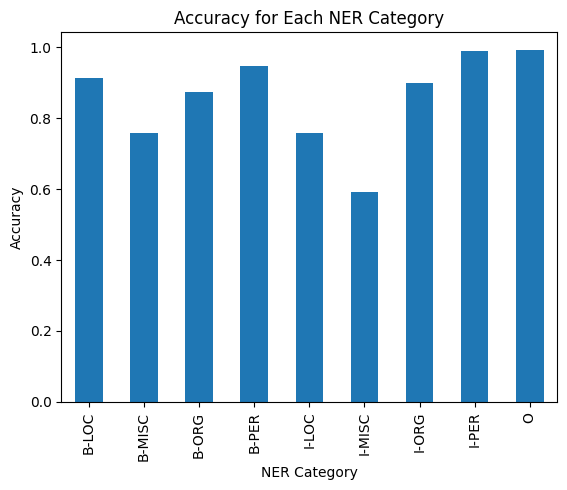

Inference Time403.30839586257935
Overall Accuracy: 0.975126520943254


In [ ]:
import numpy as np
import time
start = time.time()
# Predictions
predictions_output = trainer.predict(tokenized_dataset['test'])
predictions = np.argmax(predictions_output.predictions, axis=2)

# Align the predictions and true labels
true_labels = []
predicted_labels = []

for i, label_arr in enumerate(tokenized_dataset['test']['labels']):
    true_labels.extend([label_names[label] for label in label_arr if label != -100])
    predicted_labels.extend([label_names[pred] for pred, label in zip(predictions[i], label_arr) if label != -100])

from sklearn.metrics import confusion_matrix
import pandas as pd

labels = sorted(set(true_labels + predicted_labels))
conf_matrix = confusion_matrix(true_labels, predicted_labels, labels=labels)
conf_df = pd.DataFrame(conf_matrix, index=labels, columns=labels)

print("Confusion Matrix:")
print(conf_df)

import matplotlib.pyplot as plt

accuracies = conf_df.values.diagonal() / conf_df.sum(axis=1)
accuracies_series = pd.Series(accuracies, index=labels)

accuracies_series.plot(kind='bar')
plt.title('Accuracy for Each NER Category')
plt.xlabel('NER Category')
plt.ylabel('Accuracy')
plt.show()

# Sum of the diagonal elements (correct predictions)
correct_predictions = np.trace(conf_matrix)

# Total number of predictions
total_predictions = np.sum(conf_matrix)

# Calculate overall accuracy
overall_accuracy = correct_predictions / total_predictions
end = time.time()
print(f"Inference Time{end-start}")
print(f'Overall Accuracy: {overall_accuracy}')

# Questions

Double click this cell to add your answer under each question.

**POS tagging**

1. What is the training and inferencing time of the CRF model for POS tagging? What's its accuracy?

Train and inference time: 17.44983196258545 Seconds
Accuracy: 0.9517807036477445

2. What is the training and inferencing time of the BERT model for POS tagging? If you've trained by multiple epochs, give the average epoch time. What's its accuracy?

Train time: 2467.733060836792 Seconds
Inference time: 228.7740626335144 Seconds
Accuracy: 0.983855


3. Compare BERT's performance with CRF's in terms of training time, inferencing time and accuracy in POS tagging. What's the tradeoff and how that might affect your decision of choosing one of the two models for a specific task?

The time to both train and do inference for BERT is much greater than the combined time for both in the CRF model, however the accuracy of BERT is much higher by about 3 percent. The tradeoff is obviously time and resources for accuracy. If you are short on either, I would go for the CRF model. However, if you want the highest accuracy, go for the BERT model.



**NER**

4. What is the training and inferencing time of the CRF model for NER? What's its accuracy?

Training/Eval Time: 40.31410837173462 Seconds
Overall Accuracy: 0.9569075051146765

5. What two features did you choose for Task 2 and why?

'word ends in ed' : word.endswith("ed"),
'word starts with un' : word.startswith("un"),
I chose these because they are common prefixes and suffixes in English words that may help to extract a pattern from the data.


6.  What is the training and inferencing time of the BERT model for NER? If you've trained by multiple epochs, give the average epoch time. What's its accuracy?

Train time: 4364.185080766678 Seconds
Inference Time: 403.30839586257935 Seconds
Overall Accuracy: 0.975126520943254

7. Compare BERT's performance with CRF's in terms of training time, inferencing time and accuracy in NER. What's the tradeoff and how that might affect your decision of choosing one of the two models for a specific task?

Very similar to POS tagging, the CRF is less accurate but takes way less time to train and inference. The BERT model is more accurate but is costly to train and use.

**Extra Credit**

8. What additional features have your chosen for Task 2 and why? Each one worths 1 additional point, up to 3. Note, your final model's accuracy must not fall below 95% to receive the extra credit.

 extra creidt #1
'word is lower' : word.islower(),
 extra creidt #2
 'word.isalpha' : word.isalpha(),
  extra creidt #3
  'word.isidentifier()' : word.isidentifier(), I picked these because they are easy string identifers that further classify and separate the data into more understandable chunks.

9. What's the top 3 misclassified tags in terms of the accuracy value in each of the four Chapters? For this, you must create an additional code cell at the end of each chapter, write and execute code to sort the accuracies of each tag and report the three with the lowest accuracies.

## Rubic

Question 1,2,3,4,6,7 - 15

Question 4 - 10

Question 8 - up to 3

Question 9 - 7

Max points 110


## Submission

Ensure that your Colab notebook, with all cells executed and results visible, is downloaded in .ipynb format. Rename the downloaded file to include your name. Submit this notebook file via Canvas, and include a shareable link to the notebook stored in your Google Drive as comment. Both the submitted notebook content and the online version will undergo an initial comparison, after which, your online version will be re-executed to verify the consistency of the results.

Email chenhang@udel.edu for questions. Have fun exploring POS tagging and NER!
